# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [1]:
import json

In [2]:
with open("../data/recipes.json") as f:
    recipes = json.load(f)

In [3]:
print(recipes[0])

{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}


### Составление корпуса

In [4]:
from gensim import corpora, models
import numpy as np

Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [5]:
texts = [recipe["ingredients"] for recipe in recipes]
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [218]:
print(texts[99])
print(corpus[99])

['balsamic vinegar', 'low salt chicken broth', 'dijon mustard', 'corn starch', 'dried basil', 'garlic cloves', 'white wine vinegar']
[(90, 1), (104, 1), (229, 1), (374, 1), (391, 1), (475, 1), (476, 1)]


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

In [33]:
dictionary.get(0)

'black olives'

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [110]:
"""Multicore model"""
%%time
np.random.seed(76543)
# здесь код для построения модели:
ldamodel_multicore = models.ldamulticore.LdaMulticore(corpus, num_topics=40, passes=5)

SyntaxError: invalid syntax (<ipython-input-110-b2af6fa292fc>, line 3)

In [112]:
"""Default model"""
%%time
np.random.seed(76543)
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=40, passes=5)

CPU times: user 1min 54s, sys: 2.31 s, total: 1min 56s
Wall time: 55.3 s


In [145]:
"""Counter of ingridients and topic top-word list"""
ingridients = {
    "salt": 0,
    "sugar": 0,
    "water": 0,
    "mushrooms": 0,
    "chicken": 0,
    "eggs": 0
}
#the_number_of_symbols_to_limit_the_line_length_is__________________________79
for t, top_words in ldamodel.show_topics(num_topics=40, num_words=10,
                                         formatted=False):
    top_words = [(dictionary.get(int(item[0])), item[1]) for item in top_words]
    print('Topic', t)
    for word in top_words:
        # Update ingridients counter if 
        # desired ingridient is in the top list.
        if word[0] in ingridients.keys():
            ingridients[word[0]] += 1
        print(f'{word[0]}:{word[1]:.4f}')
    print()

Topic 0
garlic cloves:0.0841
chopped onion:0.0695
cooking spray:0.0680
salt:0.0647
water:0.0436
fat free less sodium chicken broth:0.0418
ground red pepper:0.0397
sliced green onions:0.0391
black pepper:0.0264
pinenuts:0.0243

Topic 1
corn kernels:0.0760
diced onions:0.0647
tortillas:0.0541
salt and ground black pepper:0.0526
cream cheese:0.0521
1% low-fat milk:0.0438
vegetable stock:0.0386
sliced black olives:0.0370
cream cheese, soften:0.0359
chopped fresh chives:0.0349

Topic 2
olive oil:0.0806
fresh parsley:0.0551
crushed red pepper:0.0516
salt:0.0418
grated parmesan cheese:0.0406
garlic cloves:0.0388
cherry tomatoes:0.0343
low salt chicken broth:0.0327
butter:0.0312
green beans:0.0288

Topic 3
bacon:0.0745
salt:0.0732
red pepper flakes:0.0612
ground black pepper:0.0465
garlic:0.0461
pasta:0.0421
onions:0.0377
chicken thighs:0.0366
olive oil:0.0362
fresh dill:0.0305

Topic 4
all-purpose flour:0.1302
large eggs:0.1238
salt:0.0891
milk:0.0805
butter:0.0705
sugar:0.0501
baking powder:

In [146]:
ingridients

{'salt': 23, 'sugar': 9, 'water': 10, 'mushrooms': 0, 'chicken': 1, 'eggs': 2}

In [139]:
for t, top_words in ldamodel_multicore.show_topics(num_topics=40, num_words=5, formatted=False):
    top_words = [(dictionary.get(int(item[0])), item[1]) for item in top_words]
    print('Topic', t)
    for word in top_words:
        print(f'{word[0]}:{word[1]:.4f}')
    print()

Topic 0
salt:0.0380
onions:0.0309
olive oil:0.0236
curry powder:0.0226
water:0.0221

Topic 1
water:0.0425
salt:0.0405
garlic cloves:0.0269
onions:0.0267
garlic:0.0178

Topic 2
olive oil:0.0750
salt:0.0426
grated parmesan cheese:0.0358
garlic:0.0285
onions:0.0244

Topic 3
salt:0.0533
olive oil:0.0304
ground black pepper:0.0219
extra-virgin olive oil:0.0203
shallots:0.0178

Topic 4
all-purpose flour:0.0688
salt:0.0659
sugar:0.0518
unsalted butter:0.0502
large eggs:0.0486

Topic 5
salt:0.0550
dry white wine:0.0423
olive oil:0.0353
butter:0.0337
unsalted butter:0.0295

Topic 6
sugar:0.0397
water:0.0286
bananas:0.0174
salt:0.0158
fresh lime juice:0.0146

Topic 7
soy sauce:0.0573
scallions:0.0367
sesame oil:0.0340
sugar:0.0270
salt:0.0249

Topic 8
salt:0.0359
water:0.0355
olive oil:0.0279
garlic cloves:0.0224
extra-virgin olive oil:0.0189

Topic 9
salt:0.0511
garlic cloves:0.0491
cooking spray:0.0445
olive oil:0.0429
ground black pepper:0.0231

Topic 10
salt:0.0383
large eggs:0.0352
all-purp

In [140]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open("cooking_LDA_pa_task1.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]]))

save_answers1(
    ingridients['salt'],
    ingridients['sugar'],
    ingridients['water'],
    ingridients['mushrooms'], 
    ingridients['chicken'],
    ingridients['eggs']
)

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [194]:
import copy
dictionary2 = copy.deepcopy(dictionary)
dict_size_before = len(dictionary2)

6714

__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [195]:
ingridients2 = list()
for key in dictionary2.dfs:
    if dictionary2.dfs[key] > 4000:
        ingridients2.append(key)

dictionary2.filter_tokens(bad_ids=ingridients2)
dict_size_after = len(dictionary2)

corpus2 = [dictionary2.doc2bow(text) for text in texts]

In [226]:
corpus_size_before = sum([len(doc) for doc in corpus])
corpus_size_after = sum([len(doc) for doc in corpus2])
print('dict size before:', dict_size_before)
print('dict size after:', dict_size_after)
print('corpus size before:', corpus_size_before)
print('corpus size after:', corpus_size_after)

dict size before: 6714
dict size after: 6702
corpus size before: 428249
corpus size after: 343665


In [227]:
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("cooking_LDA_pa_task2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))

In [228]:
save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after)

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [229]:
%%time
np.random.seed(76543)
ldamodel2 = models.ldamodel.LdaModel(corpus2, num_topics=40, passes=5)

CPU times: user 1min 44s, sys: 2.35 s, total: 1min 46s
Wall time: 45.7 s


In [409]:
import gensim
gensim.__version__

'3.4.0'

In [246]:
coherence_list1 = ldamodel.top_topics(corpus, texts=texts, dictionary=dictionary)
coherence_list2 = ldamodel2.top_topics(corpus2, texts=texts, dictionary=dictionary2)
mean_coherence1 = np.array([item[1] for item in coherence_list1]).mean()
mean_coherence2 = np.array([item[1] for item in coherence_list2]).mean()

In [247]:
print(mean_coherence1)
print(mean_coherence2)

-5.804997312362428
-8.31012254137923


In [245]:
def save_answers3(coherence, coherence2):
    with open("cooking_LDA_pa_task3.txt", "w") as fout:
        fout.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))

In [248]:
save_answers3(mean_coherence1, mean_coherence2)

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [256]:
ldamodel2.get_document_topics(corpus[99])

[(0, 0.128125),
 (16, 0.128125),
 (19, 0.253125),
 (22, 0.09104004),
 (38, 0.128125),
 (39, 0.16520995)]

In [254]:
ldamodel2.alpha

array([0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025], dtype=float32)

Также выведите содержимое переменной *.alpha* второй модели:

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [257]:
%%time
np.random.seed(76543)
ldamodel3 = models.ldamodel.LdaModel(corpus=corpus2, num_topics=40, passes=5, alpha=1)

CPU times: user 1min 33s, sys: 2.08 s, total: 1min 35s
Wall time: 34.2 s


In [283]:
for text in corpus2:
    counter2['ldamodel2'] += len(ldamodel2.get_document_topics(text, minimum_probability=0.01))
    counter2['ldamodel3'] += len(ldamodel3.get_document_topics(text, minimum_probability=0.01))

print(counter2)

In [396]:
def show_topics_formatted(model, dictionary, topic_n=None):
    """Auxiliary function to show topics of the trained model
    
    """
    for t, top_words in model.show_topics(num_topics=40, num_words=10, formatted=False):
        top_words = [(dictionary.get(int(item[0])), item[1]) for item in top_words]
        print('Topic', t)
        print('=======')
        for word in top_words:
            print(f'{word[0]}:{word[1]:.4f}')
        print()

In [265]:
show_topics_formatted(ldamodel3, dictionary2)

Topic 0
boneless skinless chicken breast halves:0.0563
chile pepper:0.0557
boneless chicken skinless thigh:0.0541
bread crumbs:0.0468
parsley:0.0465
kosher salt:0.0376
flank steak:0.0352
eggs:0.0341
chiles:0.0316
mussels:0.0281

Topic 1
ground cinnamon:0.0872
eggs:0.0640
raisins:0.0568
ground nutmeg:0.0536
dark brown sugar:0.0410
boiling water:0.0368
garlic salt:0.0354
diced tomatoes:0.0313
dried oregano:0.0306
anchovy fillets:0.0272

Topic 2
ground turmeric:0.0616
cumin seed:0.0606
garam masala:0.0580
ginger:0.0481
tumeric:0.0476
green chilies:0.0470
cinnamon sticks:0.0415
clove:0.0388
oil:0.0338
coriander:0.0288

Topic 3
white onion:0.1029
coarse salt:0.0788
ground pepper:0.0468
tomatillos:0.0457
large garlic cloves:0.0422
roma tomatoes:0.0360
fresh orange juice:0.0302
grits:0.0251
poblano chiles:0.0237
kosher salt:0.0225

Topic 4
milk:0.1969
oil:0.0751
cinnamon:0.0685
ground ginger:0.0669
rice:0.0572
cornmeal:0.0385
eggs:0.0282
nutmeg:0.0272
saffron:0.0253
ground cardamom:0.0239

To

In [285]:
def save_answers4(count_model2, count_model3):
    with open("cooking_LDA_pa_task4.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))

In [286]:
save_answers4(counter['ldamodel2'], counter['ldamodel3'])

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [288]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

/Users/artem/miniconda3/envs/mldaspec/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [334]:
theta = np.zeros((ldamodel2.num_topics, len(recipes)))

for j, doc in enumerate(corpus2):
    for topic, prop in ldamodel2.get_document_topics(doc):
        theta[topic, j] = prop

print(theta)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.10341785 0.0507963  0.        ]
 [0.         0.22500001 0.         ... 0.         0.06971521 0.27913815]]


In [361]:
y = np.array([recipe['cuisine'] for recipe in recipes])

In [362]:
theta.shape

(40, 39774)

In [363]:
y.shape

(39774,)

In [398]:
rf_clf = RandomForestClassifier(n_estimators=100)
cv_score_lda = cross_val_score(rf_clf, theta.T, y, cv=3).mean()
print(cv_score_lda)

0.5557657451771489


In [399]:
def save_answers5(accuracy):
     with open("cooking_LDA_pa_task5.txt", "w") as fout:
        fout.write(str(accuracy))
        
save_answers5(cv_score_lda)

In [388]:
X = np.zeros((len(dictionary2), len(corpus2)))
for j, doc in enumerate(corpus2):
    for word, count in doc:
        X[word, doc] = count

In [394]:
rf_clf = RandomForestClassifier(n_estimators=100)
cv_score = cross_val_score(rf_clf, X.T, y, cv=3, n_jobs=-1).mean()
print(cv_score)

0.1970634200484844


Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [ ]:
np.random.dirichlet(model.alpha)

In [402]:
ldamodel2.alpha

array([0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025], dtype=float32)

In [413]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        print(sum(topic_distr))
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        print(w)

In [414]:
generate_recipe(ldamodel2, 10)

0.9999999767176178


ValueError: probabilities do not sum to 1

### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [403]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [404]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [462]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(20, 20))
    seaborn.heatmap(tc_matrix, square=True)

In [459]:
# Визуализируйте матрицу
tc_matrix = compute_topic_cuisine_matrix(ldamodel2, corpus2, recipes)

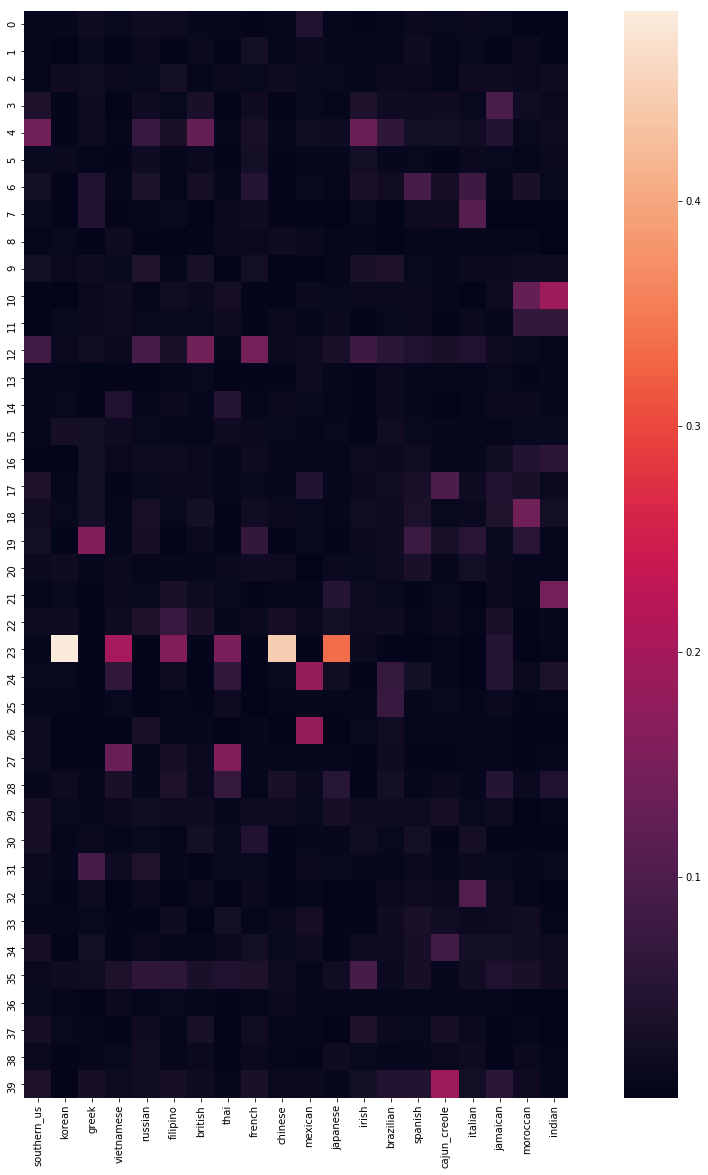

In [463]:
plot_matrix(tc_matrix)

In [465]:
show_topics_formatted(ldamodel2, dictionary2)

Topic 0
ground beef:0.1153
tomato sauce:0.0907
lean ground beef:0.0645
shredded cheddar cheese:0.0641
refried beans:0.0362
dried parsley:0.0262
black olives:0.0255
taco seasoning mix:0.0252
sliced black olives:0.0245
diced tomatoes:0.0244

Topic 1
tortilla chips:0.0707
white wine vinegar:0.0673
green pepper:0.0546
parsley:0.0465
fennel bulb:0.0421
salmon fillets:0.0331
fresh tarragon:0.0330
shallots:0.0289
shredded lettuce:0.0286
fresh parsley leaves:0.0274

Topic 2
crushed red pepper flakes:0.0877
white vinegar:0.0876
eggplant:0.0817
crushed tomatoes:0.0794
chile pepper:0.0602
zucchini:0.0577
fresh spinach:0.0379
white sugar:0.0363
salt and ground black pepper:0.0352
red wine:0.0318

Topic 3
ground nutmeg:0.0862
dried thyme:0.0773
sweet potatoes:0.0680
coarse salt:0.0589
ground cloves:0.0582
ground pepper:0.0531
melted butter:0.0429
ground cinnamon:0.0424
half & half:0.0366
ground allspice:0.0353

Topic 4
milk:0.1502
baking powder:0.1067
eggs:0.1050
baking soda:0.0722
buttermilk:0.063

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 